<a href="https://colab.research.google.com/github/iskra3138/colab_seminar/blob/master/autogluon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!nvidia-smi

# AutoGluon 설치

In [0]:
!pip install --upgrade mxnet-cu100

In [0]:
!pip install autogluon

- task.fit 실행시 'ValueError: max() arg is an empty sequence' 발생 시 아래 3가지 셀 실행
  - 출처 :<https://github.com/awslabs/autogluon/issues/163>

In [0]:
!pip uninstall -y distributed

In [0]:
!pip install distributed

In [0]:
!pip install -U ipykernel

# Image Classification

[출처] <https://autogluon.mxnet.io/tutorials/image_classification/beginner.html>

### Image Classification - Quick Start

In [0]:
import autogluon as ag
from autogluon import ImageClassification as task

### Create AutoGluon Dataset

In [2]:
filename = ag.download('https://autogluon.s3.amazonaws.com/datasets/shopee-iet.zip')
ag.unzip(filename)

'data'

In [0]:
dataset = task.Dataset('data/train')

In [0]:
test_dataset = task.Dataset('data/test', train=False)

In [0]:
if ag.get_gpu_count() == 0:
    dataset = task.Dataset(name='FashionMNIST')
    test_dataset = task.Dataset(name='FashionMNIST', train=False)

### Use AutoGluon to Fit Models

In [6]:
classifier = task.fit(dataset,
                      epochs=10,
                      ngpus_per_trial=1,
                      verbose=False)

Starting Experiments
Num of Finished Tasks is 0
Num of Pending Tasks is 2


Finished Task with config: {'net.choice': 0, 'optimizer.learning_rate': 0.0031622777, 'optimizer.wd': 0.0003162278} and reward: 0.6


Finished Task with config: {'net.choice': 1, 'optimizer.learning_rate': 0.0010736874306842964, 'optimizer.wd': 0.0002859411127846206} and reward: 0.45625


In [7]:
print('Top-1 val acc: %.3f' % classifier.results['best_reward'])

Top-1 val acc: 0.600


### Predict on a New Image

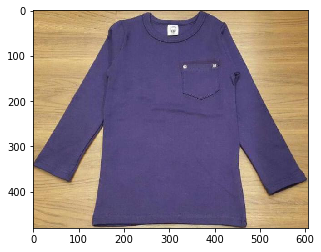

The input picture is classified as [BabyShirt], with probability 0.57.


In [11]:
# skip this if training FashionMNIST on CPU.
if ag.get_gpu_count() > 0:
    image = 'data/test/BabyShirt/BabyShirt_323.jpg'
    #ind, prob, _ = classifier.predict(image)
    ind, prob = classifier.predict(image)

    print('The input picture is classified as [%s], with probability %.2f.' %
          (dataset.init().classes[ind.asscalar()], prob.asscalar()))

### Evaluate on Test Dataset

In [12]:
test_acc = classifier.evaluate(test_dataset)
print('Top-1 test acc: %.3f' % test_acc)


Top-1 test acc: 0.703


# Tabular Prediction

[출처] <https://autogluon.mxnet.io/tutorials/tabular_prediction/tabular-quickstart.html>

### Predicting Columns in a Table - Quick Start

In [0]:
import autogluon as ag
from autogluon import TabularPrediction as task

In [0]:
train_data = task.Dataset(file_path='https://autogluon.s3.amazonaws.com/datasets/Inc/train.csv')
train_data = train_data.head(500) # subsample 500 data points for faster demo
print(train_data.head())

In [0]:
label_column = 'class'
print("Summary of class variable: \n", train_data[label_column].describe())

In [0]:
dir = 'agModels-predictClass' # specifies folder where to store trained models
predictor = task.fit(train_data=train_data, label=label_column, output_directory=dir)

In [0]:
test_data = task.Dataset(file_path='https://autogluon.s3.amazonaws.com/datasets/Inc/test.csv')
y_test = test_data[label_column]  # values to predict
test_data_nolab = test_data.drop(labels=[label_column],axis=1) # delete label column to prove we're not cheating
print(test_data_nolab.head())

In [0]:
predictor = task.load(dir) # unnecessary, just demonstrates how to load previously-trained predictor from file

y_pred = predictor.predict(test_data_nolab)
print("Predictions:  ", y_pred)
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

In [0]:
from autogluon import TabularPrediction as task
predictor = task.fit(train_data=task.Dataset(file_path=<file-name>), label_column=<variable-name>)

### Description of fit():

In [0]:
results = predictor.fit_summary()

In [0]:
print("AutoGluon infers problem type is: ", predictor.problem_type)
print("AutoGluon categorized the features as: ", predictor.feature_types)

### Regression (predicting numeric table columns):

In [0]:
age_column = 'age'
print("Summary of age variable: \n", train_data[age_column].describe())

In [0]:
predictor_age = task.fit(train_data=train_data, output_directory="agModels-predictAge", label=age_column)
performance = predictor_age.evaluate(test_data)

# Object Detection

[출처] <https://autogluon.mxnet.io/tutorials/object_detection/beginner.html>

### Object Detection - Quick Start

In [0]:
import autogluon as ag
from autogluon import ObjectDetection as task

### Tiny_motorbike Dataset

In [0]:
root = './'
filename_zip = ag.download('https://autogluon.s3.amazonaws.com/datasets/tiny_motorbike.zip',
                        path=root)
filename = ag.unzip(filename_zip, root=root)

In [0]:
import os
data_root = os.path.join(root, filename)
dataset_train = task.Dataset(data_root, classes=('motorbike',))

### Fit Models by AutoGluon

In [0]:
time_limits = 5*60*60  # 5 hours
epochs = 30
detector = task.fit(dataset_train,
                    num_trials=2,
                    epochs=epochs,
                    lr=ag.Categorical(5e-4, 1e-4),
                    ngpus_per_trial=1,
                    time_limits=time_limits)

In [0]:
dataset_test = task.Dataset(data_root, index_file_name='test', classes=('motorbike',))

test_map = detector.evaluate(dataset_test)
print("mAP on test dataset: {}".format(test_map[1][1]))

In [0]:
image = '000467.jpg'
image_path = os.path.join(data_root, 'JPEGImages', image)

ind, prob, loc = detector.predict(image_path)

# Text Classification

[출처] <https://autogluon.mxnet.io/tutorials/text_classification/beginner.html>

### Text Classification - Quick Start

In [0]:
import autogluon as ag
from autogluon import TextClassification as task

### Create AutoGluon Dataset

In [0]:
dataset = task.Dataset(name='ToySST')

### Use AutoGluon to fit Models

In [20]:
predictor = task.fit(dataset, epochs=1)

Starting Experiments
Num of Finished Tasks is 0
Num of Pending Tasks is 2


Using gradient accumulation. Effective batch size = batch_size * accumulate = 32


validation metrics:accuracy:0.8851
Finished Task with config: {'lr': 6.32456e-05, 'net.choice': 0, 'pretrained_dataset.choice': 0} and reward: 0.8850574712643678


Using gradient accumulation. Effective batch size = batch_size * accumulate = 32


validation metrics:accuracy:0.5057
Finished Task with config: {'lr': 0.00013831240790648913, 'net.choice': 0, 'pretrained_dataset.choice': 1} and reward: 0.5057471264367817
Using gradient accumulation. Effective batch size = batch_size * accumulate = 32


validation metrics:accuracy:0.8851


In [21]:
print('Top-1 val acc: %.3f' % predictor.results['best_reward'])

Top-1 val acc: 0.885


In [22]:
test_acc = predictor.evaluate(dataset)
print('Top-1 test acc: %.3f' % test_acc)

Top-1 test acc: 0.885


In [23]:
sentence = 'I feel this is awesome!'
ind = predictor.predict(sentence)
print('The input sentence sentiment is classified as [%d].' % ind.asscalar())

The input sentence sentiment is classified as [1].


In [24]:
print('The best configuration is:')
print(predictor.results['best_config'])

The best configuration is:
{'lr': 6.32456e-05, 'net.choice': 0, 'pretrained_dataset.choice': 0}
